In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Projects_Codes/Project-64_Sonic-Wave-Velocity-Predictor/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Projects_Codes/Project-64_Sonic-Wave-Velocity-Predictor/test.csv')
train_df.head(10)

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,-999.0,-999.0,41.4699,-999.0,-999.0,-999.0,-999.0,128.0737,319.0654
1,-999.0,-999.0,42.5053,-999.0,-999.0,-999.0,-999.0,127.8347,318.7825
2,-999.0,-999.0,43.1548,-999.0,-999.0,-999.0,-999.0,127.2307,317.3323
3,-999.0,-999.0,43.2410,-999.0,-999.0,-999.0,-999.0,126.2917,313.6486
4,-999.0,-999.0,40.3218,-999.0,-999.0,-999.0,-999.0,125.3985,307.8903
5,-999.0,-999.0,38.0869,-999.0,-999.0,-999.0,-999.0,125.0230,302.3839
6,-999.0,-999.0,39.5775,-999.0,-999.0,-999.0,-999.0,125.3598,300.0564
7,-999.0,-999.0,42.6044,-999.0,-999.0,-999.0,-999.0,126.4129,302.1025
8,-999.0,-999.0,42.1779,-999.0,-999.0,-999.0,-999.0,127.9622,308.5552
9,-999.0,-999.0,40.2553,-999.0,-999.0,-999.0,-999.0,129.5826,318.0407


In [ ]:
test_df.head(10)

,CAL,CNC,GR,HRD,HRM,PE,ZDEN
0,8.5781,0.3521,55.1824,0.8121,0.7810,6.8291,2.3256
1,8.5781,0.3639,57.0114,0.8038,0.7723,6.8100,2.3255
2,8.5781,0.3703,58.9263,0.7444,0.7048,6.7766,2.3212
3,8.5625,0.3667,57.3308,0.7169,0.6542,6.7219,2.3119
4,8.5781,0.3500,53.0624,0.6845,0.6109,6.6384,2.2982
5,8.5781,0.3292,48.6237,0.6335,0.5528,6.5230,2.2817
6,8.5781,0.3088,43.2046,0.6041,0.5062,6.3724,2.2648
7,8.5781,0.2946,39.2762,0.5779,0.4961,6.1726,2.2484
8,8.5625,0.2927,38.0329,0.5532,0.4731,5.9497,2.2337
9,8.5469,0.3021,35.7902,0.5411,0.4493,5.7830,2.2211


In [ ]:
df = train_df.copy()
df.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000
mean,-8.394576,-23.692615,38.959845,3.977690,1.547299,-17.446739,-20.229982,-54.891703,-9.737567
std,129.970219,157.142679,108.504554,365.112753,456.908969,149.083136,148.809506,372.858812,440.314119
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,8.058350,0.122800,17.248750,0.717700,0.712050,0.053100,2.226700,66.304350,118.534350
50%,8.625000,0.193600,36.821800,1.623000,1.628100,4.941500,2.432200,78.355100,137.689300
75%,9.048850,0.337150,58.346150,3.158300,3.280600,7.856650,2.551350,107.022500,182.973150
max,21.064200,3490.158200,1470.253400,10000.000000,60467.761700,28.106400,3.259700,155.980300,487.438400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30143 entries, 0 to 30142
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CAL     30143 non-null  float64
 1   CNC     30143 non-null  float64
 2   GR      30143 non-null  float64
 3   HRD     30143 non-null  float64
 4   HRM     30143 non-null  float64
 5   PE      30143 non-null  float64
 6   ZDEN    30143 non-null  float64
 7   DTC     30143 non-null  float64
 8   DTS     30143 non-null  float64
dtypes: float64(9)
memory usage: 2.1 MB


In [ ]:
df.replace(['-999', -999], np.nan, inplace = True) #-999 values are null values indicators, so we replace them with np.nan
df.head(10)

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,NaN,NaN,41.4699,NaN,NaN,NaN,NaN,128.0737,319.0654
1,NaN,NaN,42.5053,NaN,NaN,NaN,NaN,127.8347,318.7825
2,NaN,NaN,43.1548,NaN,NaN,NaN,NaN,127.2307,317.3323
3,NaN,NaN,43.2410,NaN,NaN,NaN,NaN,126.2917,313.6486
4,NaN,NaN,40.3218,NaN,NaN,NaN,NaN,125.3985,307.8903
5,NaN,NaN,38.0869,NaN,NaN,NaN,NaN,125.0230,302.3839
6,NaN,NaN,39.5775,NaN,NaN,NaN,NaN,125.3598,300.0564
7,NaN,NaN,42.6044,NaN,NaN,NaN,NaN,126.4129,302.1025
8,NaN,NaN,42.1779,NaN,NaN,NaN,NaN,127.9622,308.5552
9,NaN,NaN,40.2553,NaN,NaN,NaN,NaN,129.5826,318.0407


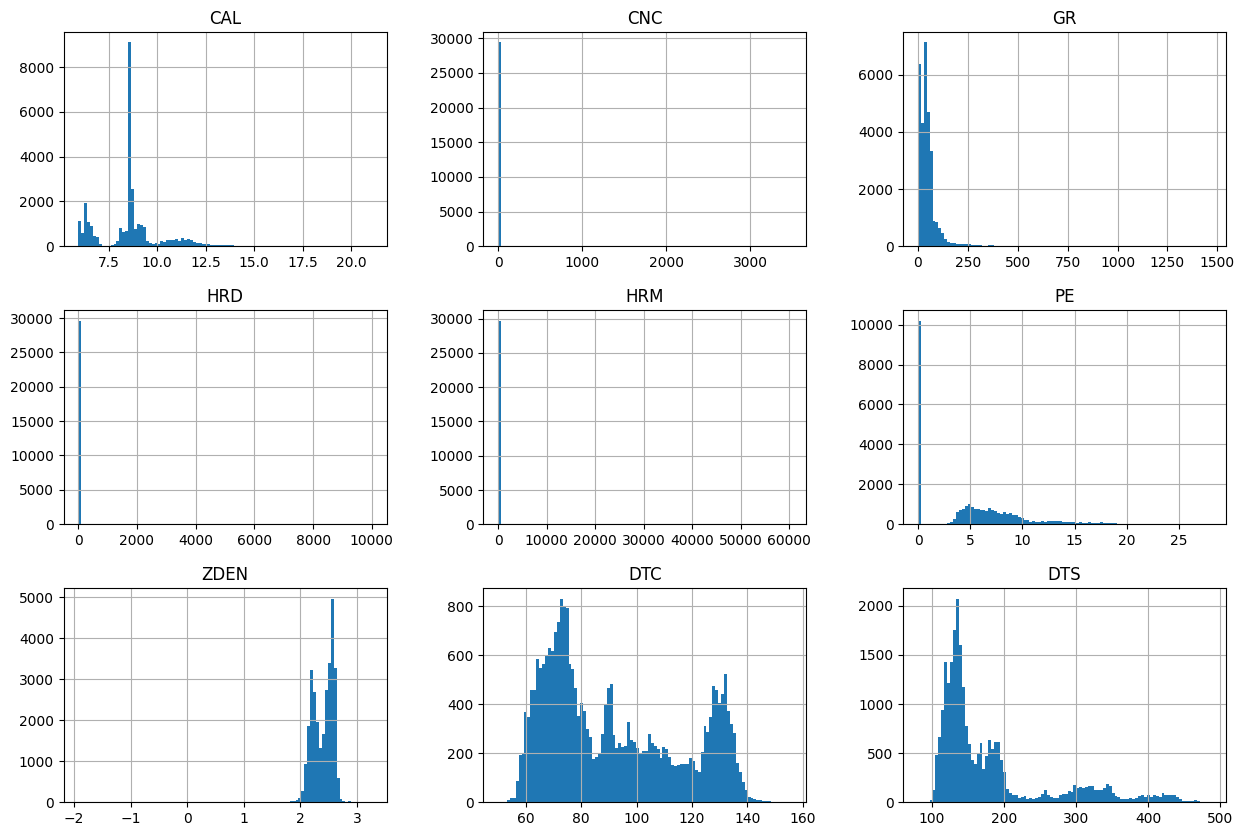

In [ ]:
histdf = df.hist(bins = 100, figsize = (15, 10))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

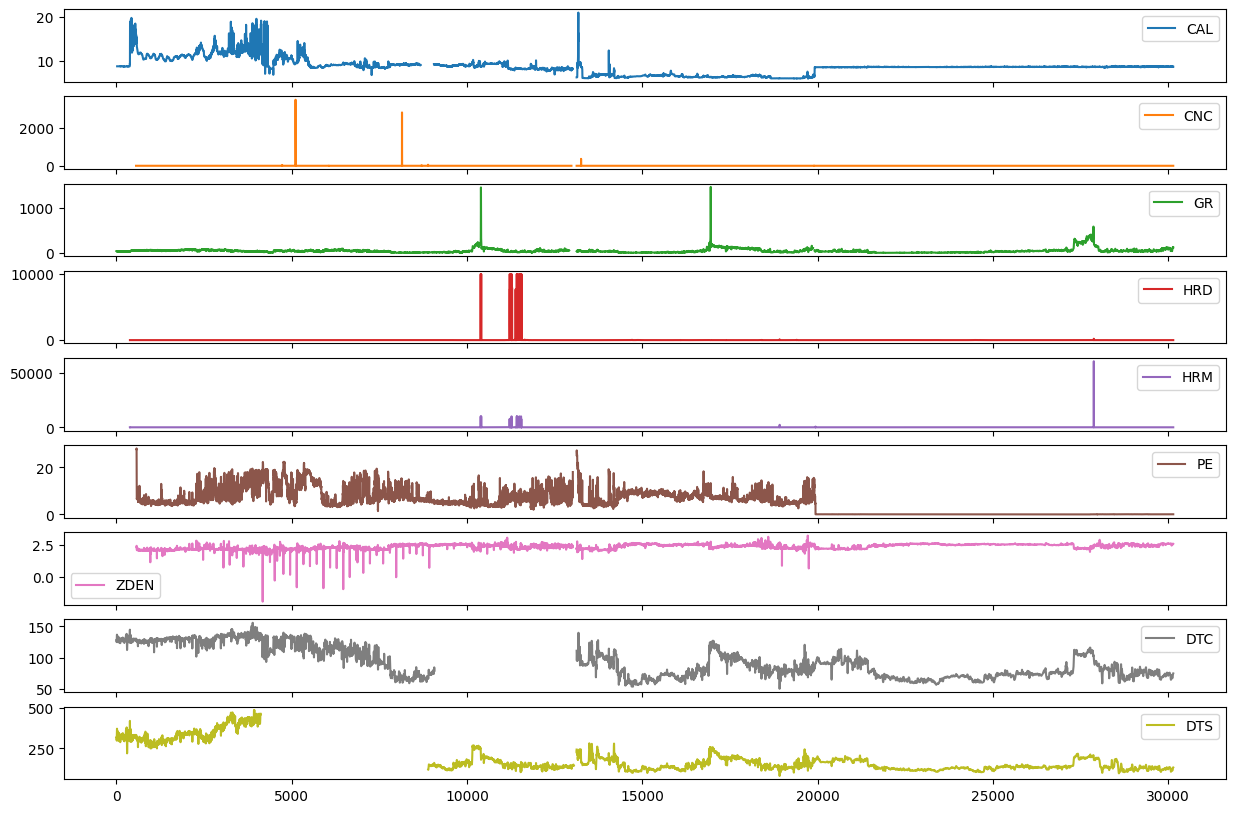

In [ ]:
df.plot(subplots = True, figsize = (15, 10))

In [ ]:
#We will also make all of the negative values as null
cols = ['ZDEN', 'GR', 'CNC', 'PE']
df[cols] = df[cols].mask(df[cols] < 0)
df.head(10)

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,NaN,NaN,41.4699,NaN,NaN,NaN,NaN,128.0737,319.0654
1,NaN,NaN,42.5053,NaN,NaN,NaN,NaN,127.8347,318.7825
2,NaN,NaN,43.1548,NaN,NaN,NaN,NaN,127.2307,317.3323
3,NaN,NaN,43.2410,NaN,NaN,NaN,NaN,126.2917,313.6486
4,NaN,NaN,40.3218,NaN,NaN,NaN,NaN,125.3985,307.8903
5,NaN,NaN,38.0869,NaN,NaN,NaN,NaN,125.0230,302.3839
6,NaN,NaN,39.5775,NaN,NaN,NaN,NaN,125.3598,300.0564
7,NaN,NaN,42.6044,NaN,NaN,NaN,NaN,126.4129,302.1025
8,NaN,NaN,42.1779,NaN,NaN,NaN,NaN,127.9622,308.5552
9,NaN,NaN,40.2553,NaN,NaN,NaN,NaN,129.5826,318.0407


In [ ]:
#Since we want our model to have the most accuracy, we will also mark any outliers as null
df.loc[df['GR'] > 250, 'GR'] = np.nan
df.loc[df['CNC'] > 0.7, 'CNC'] = np.nan
df.loc[df['HRM'] > 200, 'HRM'] = np.nan
df.loc[df['HRD'] > 200, 'HRD'] = np.nan
df.head(10)

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,NaN,NaN,41.4699,NaN,NaN,NaN,NaN,128.0737,319.0654
1,NaN,NaN,42.5053,NaN,NaN,NaN,NaN,127.8347,318.7825
2,NaN,NaN,43.1548,NaN,NaN,NaN,NaN,127.2307,317.3323
3,NaN,NaN,43.2410,NaN,NaN,NaN,NaN,126.2917,313.6486
4,NaN,NaN,40.3218,NaN,NaN,NaN,NaN,125.3985,307.8903
5,NaN,NaN,38.0869,NaN,NaN,NaN,NaN,125.0230,302.3839
6,NaN,NaN,39.5775,NaN,NaN,NaN,NaN,125.3598,300.0564
7,NaN,NaN,42.6044,NaN,NaN,NaN,NaN,126.4129,302.1025
8,NaN,NaN,42.1779,NaN,NaN,NaN,NaN,127.9622,308.5552
9,NaN,NaN,40.2553,NaN,NaN,NaN,NaN,129.5826,318.0407


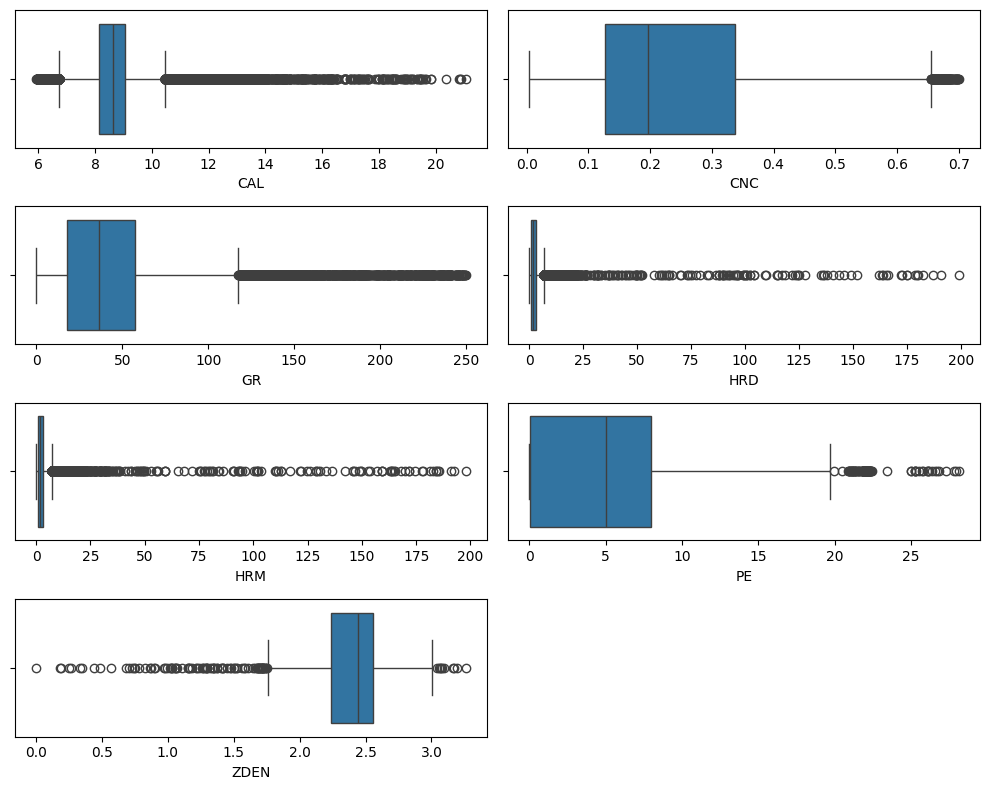

In [ ]:
plt.figure(figsize = (10, 8))

plt.subplot(4, 2, 1)
sns.boxplot(df['CAL'], orient = 'h')
plt.subplot(4, 2, 2)
sns.boxplot(df['CNC'], orient = 'h')
plt.subplot(4, 2, 3)
sns.boxplot(df['GR'], orient = 'h')
plt.subplot(4, 2, 4)
sns.boxplot(df['HRD'], orient = 'h')
plt.subplot(4, 2, 5)
sns.boxplot(df['HRM'], orient = 'h')
plt.subplot(4, 2, 6)
sns.boxplot(df['PE'], orient = 'h')
plt.subplot(4, 2, 7)
sns.boxplot(df['ZDEN'], orient = 'h')

plt.tight_layout()
plt.show()

In [ ]:
#Finding correlaions between variables
df.corr()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
CAL,1.000000,0.582005,0.040421,-0.096452,-0.065556,0.163877,-0.368183,0.585637,0.681271
CNC,0.582005,1.000000,0.486927,-0.203667,-0.189963,0.437687,-0.698973,0.943968,0.898753
GR,0.040421,0.486927,1.000000,-0.113788,-0.105287,0.031718,-0.178068,0.427692,0.308994
HRD,-0.096452,-0.203667,-0.113788,1.000000,0.917925,-0.048037,0.126954,-0.466290,-0.165457
HRM,-0.065556,-0.189963,-0.105287,0.917925,1.000000,-0.067840,0.118628,-0.346250,-0.149600
PE,0.163877,0.437687,0.031718,-0.048037,-0.067840,1.000000,-0.340607,0.477524,0.440266
ZDEN,-0.368183,-0.698973,-0.178068,0.126954,0.118628,-0.340607,1.000000,-0.756792,-0.670186
DTC,0.585637,0.943968,0.427692,-0.466290,-0.346250,0.477524,-0.756792,1.000000,0.941639
DTS,0.681271,0.898753,0.308994,-0.165457,-0.149600,0.440266,-0.670186,0.941639,1.000000


In [ ]:
test_df.corr()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN
CAL,1.000000,-0.290943,0.024399,0.037764,0.050929,0.446757,0.438947
CNC,-0.290943,1.000000,0.575440,-0.247362,0.016520,-0.563464,-0.710657
GR,0.024399,0.575440,1.000000,-0.124756,0.154772,-0.121305,-0.129897
HRD,0.037764,-0.247362,-0.124756,1.000000,0.415450,-0.002108,0.077118
HRM,0.050929,0.016520,0.154772,0.415450,1.000000,0.046397,0.028714
PE,0.446757,-0.563464,-0.121305,-0.002108,0.046397,1.000000,0.870180
ZDEN,0.438947,-0.710657,-0.129897,0.077118,0.028714,0.870180,1.000000


In [ ]:
!pip install ppscore

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 89.9 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13166 sha256=e6a8603a121a3d6a81d9cdbe7c10ebd7400d46f2d6f603304c8678dd63408729
  Stored in directory: /root/.cache/pip/wheels/7e/45/08/bb444e1bca6a2bc3795707de9edd87ec1976dd8b3570fa7abf
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible

<Axes: xlabel='x', ylabel='y'>

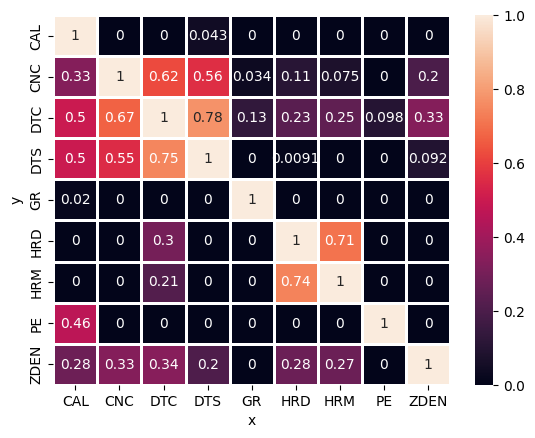

In [ ]:
#Now we will use Predictive Power Scoring (PPS) to detect linear or non-linear relationships between columns
import ppscore as pps
matrix_df = pps.matrix(df).pivot(columns = 'x', index = 'y', values = 'ppscore')
sns.heatmap(matrix_df, vmin = 0, vmax = 1, linewidths = 1.0, annot = True)

In [ ]:
#Now we will start our modelling and predictions
#Since we want to predict two values- DTC and DTS we will make separate datasets for each
df_dtc = df.dropna(subset = ['DTC'])
df_dts = df.dropna(subset = ['DTS'])

In [ ]:
df_dtc = df_dtc.dropna()
df_dts = df_dts.dropna()

In [ ]:
#We define separate dependent and independent variables for the two datasets
df_dtc_x = df_dtc.drop(columns = ['DTC', 'DTS'])
df_dtc_y = df_dtc['DTC']
df_dts_x = df_dts.drop(columns = ['DTC', 'DTS'])
df_dts_y = df_dts['DTS']

In [ ]:
X_train_dtc, X_test_dtc, y_train_dtc, y_test_dtc = train_test_split(df_dtc_x, df_dtc_y, test_size = 0.3, random_state = 42, shuffle = True)

In [ ]:
X_train_dts, X_test_dts, y_train_dts, y_test_dts = train_test_split(df_dts_x, df_dts_y, test_size = 0.3, random_state = 42, shuffle = True)

In [ ]:
#We will use XGBoost models with hyperparamaters for our predictions

In [ ]:
#Predictions for DTC
xgb_dtc = xgb.XGBRegressor(random_state = 42, max_depth = 2, learning_rate = 0.18, n_estimators = 145, min_child_weight = 6, gamma = 0.3)
xgb_dtc.fit(X_train_dtc, y_train_dtc)
y_pred_test_dtc = xgb_dtc.predict(X_test_dtc)
y_pred_train_dtc = xgb_dtc.predict(X_train_dtc)
print("RMSE Train:  ", str(np.sqrt(mean_squared_error(y_train_dtc, y_pred_train_dtc))))
print("RMSE Test:  ", str(np.sqrt(mean_squared_error(y_test_dtc, y_pred_test_dtc))))
print("R2_Train:  ", str(r2_score(y_train_dtc, y_pred_train_dtc)))
print("R2_Test:  ", str(r2_score(y_test_dtc, y_pred_test_dtc)))

RMSE Train:   3.584946092591071
RMSE Test:   3.6756515194533694
R2_Train:   0.9766494705527314
R2_Test:   0.975268768785469


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

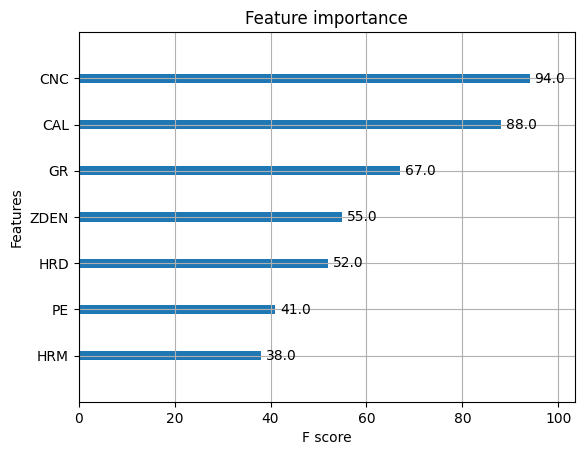

In [ ]:
xgb.plot_importance(xgb_dtc)

In [ ]:
#We will do the same for DTS
xgb_dts = xgb.XGBRegressor(random_state = 42, max_depth = 7, learning_rate = 0.19, n_estimators = 135, min_child_weight = 6, gamma = 0.7)
xgb_dts.fit(X_train_dts, y_train_dts)
y_pred_test_dts = xgb_dts.predict(X_test_dts)
y_pred_train_dts = xgb_dts.predict(X_train_dts)
print("RMSE Train:   ", str(np.sqrt(mean_squared_error(y_train_dts, y_pred_train_dts))))
print("RMSE Test:   ", str(np.sqrt(mean_squared_error(y_test_dts, y_pred_test_dts))))
print("R2_Train:   ", str(r2_score(y_train_dts, y_pred_train_dts)))
print("R2_Test:   ", str(r2_score(y_test_dts, y_pred_test_dts)))

RMSE Train:    4.422302884188518
RMSE Test:    9.049209408472974
R2_Train:    0.9972535832257804
R2_Test:    0.9886251020341463


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

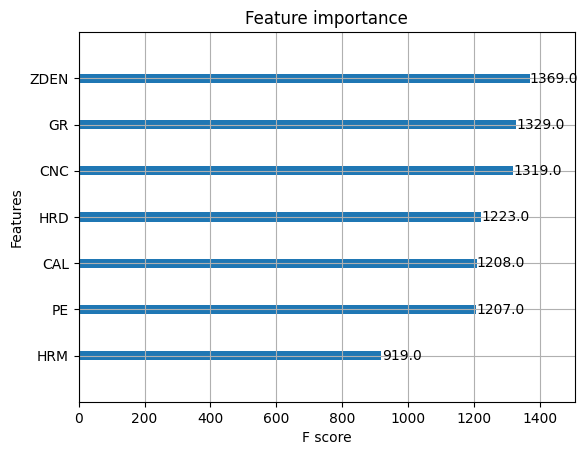

In [ ]:
xgb.plot_importance(xgb_dts)

In [ ]:
#We will now start predictions on test data (to check with real test values)
test_df.replace(['-999', -999], np.nan, inplace = True)
#Nullify negative values
columns = ['CNC', 'GR', 'PE', 'ZDEN']
test_df[columns] = test_df[columns].mask(test_df[columns] < 0)
#Nullify outliers
test_df.loc[test_df['CNC'] > 0.7, 'CNC'] = np.nan
test_df.loc[test_df['GR'] > 250, 'GR'] = np.nan
test_df.loc[test_df['HRD'] > 200, 'HRD'] = np.nan
test_df.loc[test_df['HRM'] > 200, 'HRM'] = np.nan
#We will also apply log tranformation to HRD and HRM columns
#We did not do this with train dataset since those columns had only null values, which is not the case here
test_df['HRD'] = np.log(test_df['HRD'])
test_df['HRM'] = np.log(test_df['HRM'])

In [ ]:
test_df.isnull().sum()

,0
CAL,0
CNC,0
GR,33
HRD,1
HRM,27
PE,0
ZDEN,0


In [ ]:
#We will fill remaining null values with column means
test_df['GR'] = test_df['GR'].fillna(test_df['GR'].mean())
test_df['HRD'] = test_df['HRD'].fillna(test_df['HRD'].mean())
test_df['HRM'] = test_df['HRM'].fillna(test_df['HRM'].mean())
test_df.head(10)

,CAL,CNC,GR,HRD,HRM,PE,ZDEN
0,8.5781,0.3521,55.1824,-0.208132,-0.247180,6.8291,2.3256
1,8.5781,0.3639,57.0114,-0.218405,-0.258382,6.8100,2.3255
2,8.5781,0.3703,58.9263,-0.295177,-0.349841,6.7766,2.3212
3,8.5625,0.3667,57.3308,-0.332819,-0.424342,6.7219,2.3119
4,8.5781,0.3500,53.0624,-0.379067,-0.492822,6.6384,2.2982
5,8.5781,0.3292,48.6237,-0.456495,-0.592759,6.5230,2.2817
6,8.5781,0.3088,43.2046,-0.504016,-0.680823,6.3724,2.2648
7,8.5781,0.2946,39.2762,-0.548354,-0.700978,6.1726,2.2484
8,8.5625,0.2927,38.0329,-0.592036,-0.748448,5.9497,2.2337
9,8.5469,0.3021,35.7902,-0.614151,-0.800064,5.7830,2.2211


In [ ]:
test_df.shape

(11088, 7)

In [ ]:
test_x = test_df.copy()

In [ ]:
#We will now start our predictions
test_df['DTC'] = xgb_dtc.predict(test_x)
test_df['DTS'] = xgb_dts.predict(test_x)
test_df.head(10)

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,8.5781,0.3521,55.1824,-0.208132,-0.247180,6.8291,2.3256,105.856895,226.863251
1,8.5781,0.3639,57.0114,-0.218405,-0.258382,6.8100,2.3255,106.204300,231.458435
2,8.5781,0.3703,58.9263,-0.295177,-0.349841,6.7766,2.3212,106.204300,228.342133
3,8.5625,0.3667,57.3308,-0.332819,-0.424342,6.7219,2.3119,106.312294,230.094604
4,8.5781,0.3500,53.0624,-0.379067,-0.492822,6.6384,2.2982,106.085564,226.552567
5,8.5781,0.3292,48.6237,-0.456495,-0.592759,6.5230,2.2817,104.043457,214.837021
6,8.5781,0.3088,43.2046,-0.504016,-0.680823,6.3724,2.2648,101.879097,198.628113
7,8.5781,0.2946,39.2762,-0.548354,-0.700978,6.1726,2.2484,98.807617,197.016830
8,8.5625,0.2927,38.0329,-0.592036,-0.748448,5.9497,2.2337,100.067574,194.838577
9,8.5469,0.3021,35.7902,-0.614151,-0.800064,5.7830,2.2211,100.067574,192.548157


In [ ]:
#We now compare our predictions with the actual observed values
actual_df = pd.read_csv('/content/drive/MyDrive/Projects_Codes/Project-64_Sonic-Wave-Velocity-Predictor/real_test_result.csv')
actual_df.head(10)

,DTC,DTS
0,107.0669,261.0363
1,107.8095,260.1601
2,108.2305,261.0667
3,108.4281,262.5100
4,108.2227,263.3599
5,107.5473,263.6043
6,106.7604,264.0946
7,106.6298,267.6157
8,106.2499,267.8823
9,105.7040,265.9851


In [ ]:
actual_df.shape

(11088, 2)

In [ ]:
pred_df = test_df[['DTC', 'DTS']]
pred_df.shape

(11088, 2)

In [ ]:
preds = np.array(pred_df)
reals = np.real(actual_df)

In [ ]:
#We will use a plot to compare our predictions to actual values
def result_plot(y_predict, y_real):
  print('Combined r2 score is:', '{:.5f}'.format((r2_score(y_real, y_predict))))
  dtc_real = y_real[:, 0]
  dtc_pred = y_predict[:, 0]
  dts_real = y_real[:, 1]
  dts_pred = y_predict[:, 1]
  print('DTC:', '{:.5f}'.format((r2_score(dtc_real, dtc_pred))))
  print('DTS:', '{:.5f}'.format((r2_score(dts_real, dts_pred))))
  plt.subplots(nrows=2, ncols=2, figsize=(16,10))
  plt.subplot(2, 2, 1)
  plt.plot(y_real[:, 0])
  plt.plot(y_predict[:, 0])
  plt.legend(['True', 'Predicted'])
  plt.xlabel('Sample')
  plt.ylabel('DTC')
  plt.title('DTC Prediction Comparison')

  plt.subplot(2, 2, 2)
  plt.plot(y_real[:, 1])
  plt.plot(y_predict[:, 1])
  plt.legend(['True', 'Predicted'])
  plt.xlabel('Sample')
  plt.ylabel('DTS')
  plt.title('DTS Prediction Comparison')

  plt.subplot(2, 2, 3)
  plt.scatter(y_real[:, 0], y_predict[:, 0])
  plt.xlabel('Real Value')
  plt.ylabel('Predicted Value')
  plt.title('DTC Prediction Comparison')

  plt.subplot(2, 2, 4)
  plt.scatter(y_real[:, 1], y_predict[:, 1])
  plt.xlabel('Real Value')
  plt.ylabel('Predicted Value')
  plt.title('DTS Prediction Comparison')
  plt.show()

Combined r2 score is: 0.78084
DTC: 0.90217
DTS: 0.65951


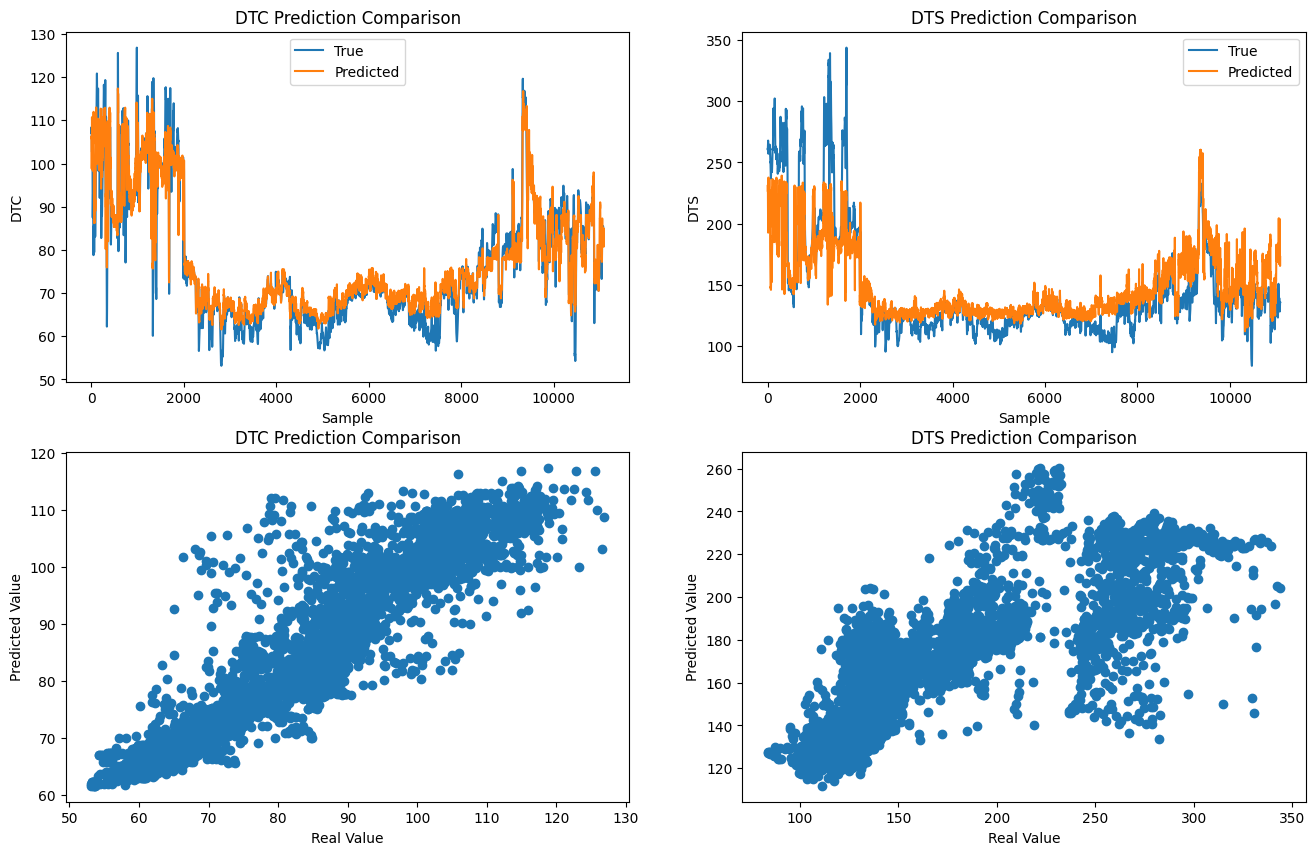

In [ ]:
result_plot(preds, reals)

RMSE of test data (#1 DTC): 4.53
RMSE of test data (#2 DTS): 25.90
Overall RMSE = 18.59


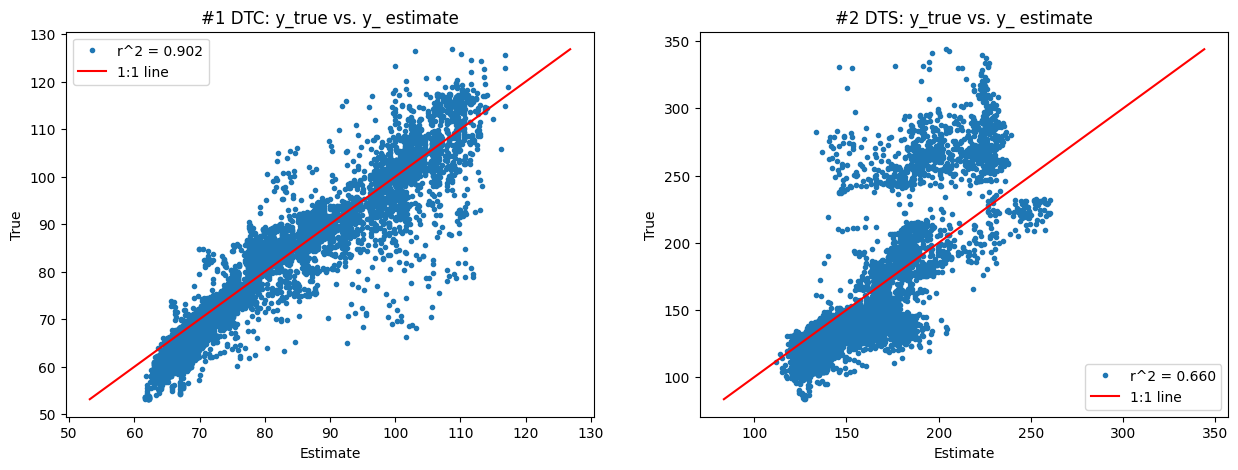

In [ ]:
# Plot results:
plt.figure(figsize=(15,5))
i = 0
plt.subplot(1,2,i+1)
plt.plot(preds[:,i], reals[:,i], '.', label = 'r^2 = %.3f' % ((r2_score(reals[:,i], preds[:,i]))))
plt.plot([reals[:,i].min(),reals[:,i].max()],[reals[:,i].min(),reals[:,i].max()], 'r', label = '1:1 line')
plt.title('#1 DTC: y_true vs. y_ estimate'); plt.xlabel('Estimate'); plt.ylabel('True')
plt.legend()
i += 1
plt.subplot(1,2,i+1)
plt.plot(preds[:,i], reals[:,i], '.', label = 'r^2 = %.3f' % ((r2_score(reals[:,i], preds[:,i]))))
plt.plot([reals[:,i].min(),reals[:,i].max()],[reals[:,i].min(),reals[:,i].max()], 'r', label = '1:1 line')
plt.title('#2 DTS: y_true vs. y_ estimate'); plt.xlabel('Estimate'); plt.ylabel('True')
plt.legend()

MSE_0 = mean_squared_error(reals[:,0], preds[:,0]);
RMSE_0 = np.sqrt(mean_squared_error(reals[:,0], preds[:,0]));
MSE_1 = mean_squared_error(reals[:,1], preds[:,1]);
RMSE_1 = np.sqrt(mean_squared_error(reals[:,1], preds[:,1]));
print('RMSE of test data (#1 DTC): %.2f' %(RMSE_0))
print('RMSE of test data (#2 DTS): %.2f' %(RMSE_1))
print('Overall RMSE = %.2f' %np.sqrt((MSE_0+MSE_1)/2))

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/1

In [ ]:
#Using Pycaret for modelling and prediction
from pycaret.regression import *

# Drop the DTC column and define data
df_dtspycaret = df_dts.drop(['DTC'], axis=1)

# Set up the modeling environment
model = setup(
    data=df_dtspycaret,
    target='DTS',
    normalize=True,
    remove_outliers=True,
    profile=True
)


,Description,Value
0,Session id,2885
1,Target,DTS
2,Target type,Regression
3,Original data shape,"(20036, 8)"
4,Transformed data shape,"(19334, 8)"
5,Transformed train set shape,"(13323, 8)"
6,Transformed test set shape,"(6011, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


Loading profile... Please Wait!
Profiler Failed. No output to show, continue with modeling.


In [ ]:
xgb = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.9440,94.8903,9.7412,0.9874,0.0514,0.0325
1,5.7383,90.9417,9.5363,0.9868,0.0507,0.0324
2,5.9026,89.0782,9.4381,0.9881,0.0500,0.0331
3,5.6092,106.3396,10.3121,0.9850,0.0504,0.0311
4,5.6834,118.9893,10.9082,0.9831,0.0514,0.0315
5,5.4212,79.2389,8.9016,0.9892,0.0452,0.0299
6,5.5732,82.1123,9.0616,0.9886,0.0494,0.0312
7,5.9496,110.1752,10.4964,0.9838,0.0503,0.0330
8,5.4991,85.7019,9.2575,0.9879,0.0482,0.0313


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

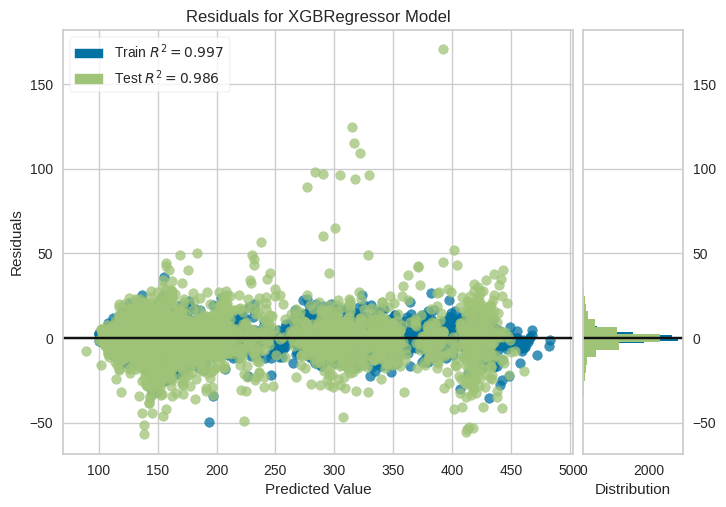

In [ ]:
plot_model(xgb)

In [ ]:
df_dtcpycaret= df_dtc.drop(['DTS'],axis=1)
model = setup(
    data=df_dtcpycaret,
    target='DTC',
    normalize=True,
    remove_outliers=True,
    profile=True
)

,Description,Value
0,Session id,8964
1,Target,DTC
2,Target type,Regression
3,Original data shape,"(20036, 8)"
4,Transformed data shape,"(19334, 8)"
5,Transformed train set shape,"(13323, 8)"
6,Transformed test set shape,"(6011, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


Loading profile... Please Wait!
Profiler Failed. No output to show, continue with modeling.


In [ ]:
xgb = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8009,8.8146,2.9689,0.9844,0.0325,0.0206
1,1.9875,12.6549,3.5574,0.9759,0.0383,0.0227
2,1.9324,8.5847,2.9300,0.9853,0.0322,0.0223
3,2.0283,12.6950,3.5630,0.9771,0.0388,0.0231
4,2.0201,10.7688,3.2816,0.9804,0.0364,0.0233
5,1.7777,7.7131,2.7773,0.9859,0.0305,0.0204
6,1.9415,10.8315,3.2911,0.9804,0.0356,0.0223
7,2.0977,12.4661,3.5307,0.9763,0.0381,0.0240
8,1.9334,10.1979,3.1934,0.9809,0.0349,0.0222


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

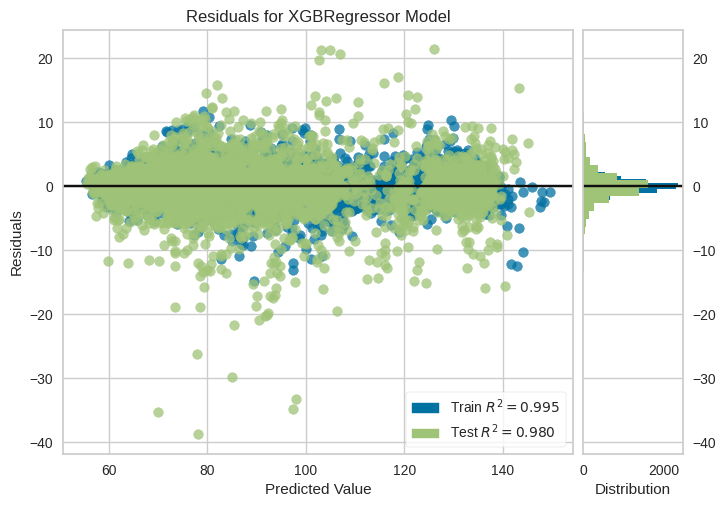

In [ ]:
plot_model(xgb)